In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [199]:
data = pd.read_csv('./data/ds_salaries.csv')
salary_cols = ['entry', 'early', 'mid', 'senior']
for col in salary_cols:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

In [200]:
salary_cols = ['entry', 'early', 'mid', 'senior']
for col in salary_cols:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

In [201]:
data.head(10)

,country,region,entry,early,mid,senior
0,Albania,Southern Europe,12780.0,14484.0,17040.0,19596.0
1,Austria,Western Europe,52713.0,59741.0,70284.0,80827.0
2,Belarus,Eastern Europe,10341.0,11720.0,13788.0,15856.0
3,Belgium,Western Europe,61227.0,69391.0,81636.0,93881.0
4,Bosnia and Herzegovina,Southern Europe,14508.0,16442.0,19344.0,22246.0
5,Bulgaria,Eastern Europe,20430.0,23154.0,27240.0,31326.0
6,Croatia,Southern Europe,28044.0,31783.0,37392.0,43001.0
7,Cyprus,Southern Europe,36288.0,41126.0,48384.0,55642.0
8,Denmark,Northern Europe,75546.0,85619.0,100728.0,115837.0
9,Estonia,Northern Europe,32418.0,36740.0,43224.0,49708.0


In [202]:
threshold = 80000
data['high_paying'] = (data['senior'] >= threshold).astype(int)

In [203]:
X = data[['entry', 'early']].values
y = data['high_paying'].values
m = len(y)

In [204]:
X = np.c_[np.ones(m), X]

In [205]:
mu = np.mean(X[:, 1:], axis=0)
sigma = np.std(X[:, 1:], axis=0)
X_norm = np.copy(X)
X_norm[:, 1:] = (X[:, 1:] - mu) / sigma

In [206]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [216]:
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    J = -1/m * (y @ np.log(h) + (1-y) @ np.log(1-h))
    grad = 1/m * X.T @ (h - y)
    return J, grad

In [217]:
initial_theta = np.zeros(3)
res = minimize(costFunction, initial_theta, (X_norm, y), jac=True, method='BFGS', options={'maxiter': 400})
theta = res.x

C:\Users\Guill\AppData\Local\Temp\ipykernel_13248\2508378179.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y @ np.log(h) + (1-y) @ np.log(1-h))
C:\Users\Guill\AppData\Local\Temp\ipykernel_13248\2508378179.py:4: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y @ np.log(h) + (1-y) @ np.log(1-h))
C:\Users\Guill\AppData\Local\Temp\ipykernel_13248\2508378179.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y @ np.log(h) + (1-y) @ np.log(1-h))
C:\Users\Guill\AppData\Local\Temp\ipykernel_13248\2508378179.py:4: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y @ np.log(h) + (1-y) @ np.log(1-h))


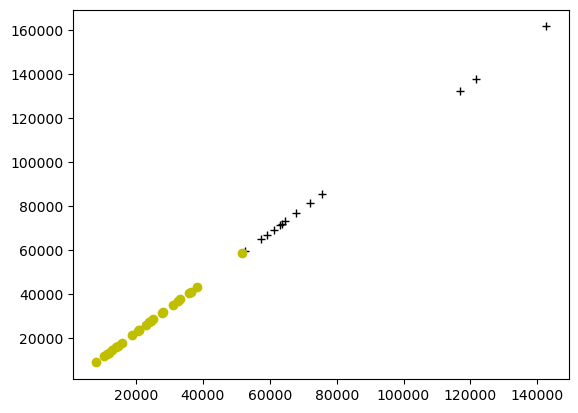

In [218]:
pos = (y == 1)
neg = (y == 0)
plt.figure()
plt.plot(X[pos, 1], X[pos, 2], 'k+', label='High paying')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not high')

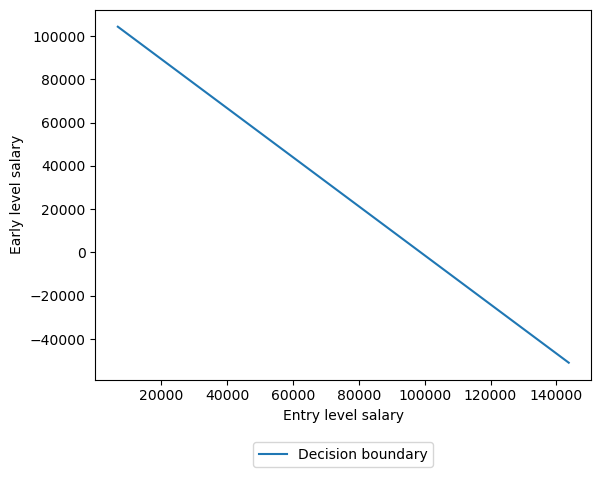

In [219]:
x_plot = np.linspace(X[:,1].min() - 1000, X[:,1].max() + 1000, 100)
x1_norm = (x_plot - mu[0]) / sigma[0]
x2_norm = - (theta[0] + theta[1] * x1_norm) / theta[2]
y_plot = x2_norm * sigma[1] + mu[1]
plt.plot(x_plot, y_plot, label='Decision boundary')

plt.xlabel('Entry level salary')
plt.ylabel('Early level salary')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15));

In [220]:
def predict(X, theta):
    # Assumes X includes intercept; normalize if not already done
    X_input = np.c_[np.ones(len(X)), X]
    X_input[:, 1:] = (X_input[:, 1:] - mu) / sigma
    return sigmoid(X_input @ theta) >= 0.5

In [221]:
p = predict(data[['entry', 'early']].values, theta)
acc = np.mean(p == y) * 100
print(f"Training accuracy: {acc}%")

Training accuracy: 97.36842105263158%


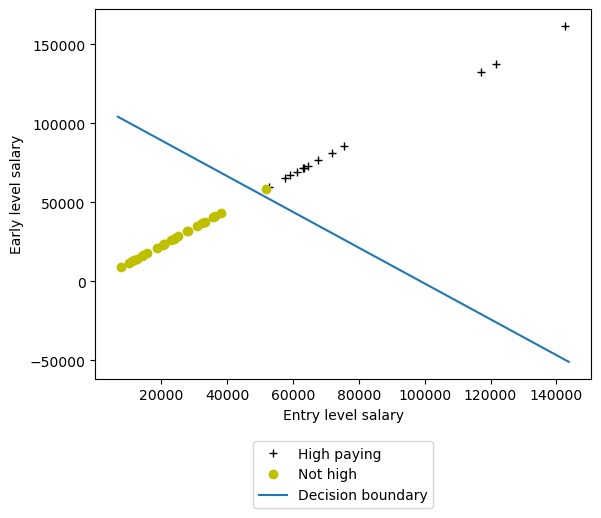

In [222]:
pos = (y == 1)
neg = (y == 0)
plt.figure()
plt.plot(X[pos, 1], X[pos, 2], 'k+', label='High paying')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not high')
x_plot = np.linspace(X[:,1].min() - 1000, X[:,1].max() + 1000, 100)
x1_norm = (x_plot - mu[0]) / sigma[0]
x2_norm = - (theta[0] + theta[1] * x1_norm) / theta[2]
y_plot = x2_norm * sigma[1] + mu[1]
plt.plot(x_plot, y_plot, label='Decision boundary')

plt.xlabel('Entry level salary')
plt.ylabel('Early level salary')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15));